In [ ]:
library(tidyverse)

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)
library(ggplot2)

Load the dataset

In [ ]:
data <- read.csv("/content/Most Streamed Spotify Songs 2024.csv")

In [ ]:
str(data)

'data.frame':	4600 obs. of  29 variables:
 $ Track                     : chr  "MILLION DOLLAR BABY" "Not Like Us" "i like the way you kiss me" "Flowers" ...
 $ Album.Name                : chr  "Million Dollar Baby - Single" "Not Like Us" "I like the way you kiss me" "Flowers - Single" ...
 $ Artist                    : chr  "Tommy Richman" "Kendrick Lamar" "Artemas" "Miley Cyrus" ...
 $ Release.Date              : chr  "4/26/2024" "5/4/2024" "3/19/2024" "1/12/2023" ...
 $ ISRC                      : chr  "QM24S2402528" "USUG12400910" "QZJ842400387" "USSM12209777" ...
 $ All.Time.Rank             : chr  "1" "2" "3" "4" ...
 $ Track.Score               : num  725 546 538 445 423 ...
 $ Spotify.Streams           : chr  "390,470,936" "323,703,884" "601,309,283" "2,031,280,633" ...
 $ Spotify.Playlist.Count    : chr  "30,716" "28,113" "54,331" "269,802" ...
 $ Spotify.Playlist.Reach    : chr  "196,631,588" "174,597,137" "211,607,669" "136,569,078" ...
 $ Spotify.Popularity        : int  92 

Check for missing values

In [ ]:
missing_values <- colSums(is.na(data))
print(missing_values)

                     Track                 Album.Name 
                         0                          0 
                    Artist               Release.Date 
                         0                          0 
                      ISRC              All.Time.Rank 
                         0                          0 
               Track.Score            Spotify.Streams 
                         0                          0 
    Spotify.Playlist.Count     Spotify.Playlist.Reach 
                         0                          0 
        Spotify.Popularity              YouTube.Views 
                       804                          0 
             YouTube.Likes               TikTok.Posts 
                         0                          0 
              TikTok.Likes               TikTok.Views 
                         0                          0 
    YouTube.Playlist.Reach Apple.Music.Playlist.Count 
                         0                        561 
          

DATA TRANSFORMATION

Convert 'Spotify Streams' and other numeric columns

In [ ]:
data <- data %>%
  mutate('Spotify Streams' = as.numeric(gsub(",","",Spotify.Streams)),
  'YouTube Views' = as.numeric(gsub(",","",YouTube.Views)),
  'TikTok Views' = as.numeric(gsub(",","",TikTok.Views)),
  'Pandora Streams' = as.numeric(gsub(",","",Pandora.Streams)),
  'Soundcloud Streams' = as.numeric(gsub(",","",Soundcloud.Streams)))

**DATA ANALYSIS AND VISUALIZATION**

1. Top 10 Songs on Spotify

In [ ]:
top_10_songs <- data %>%
  arrange(desc('Spotify Streams')) %>%
  head(10) %>%
  select(Track, Artist,'Spotify Streams')
print(top_10_songs)

                        Track         Artist Spotify Streams
1         MILLION DOLLAR BABY  Tommy Richman       390470936
2                 Not Like Us Kendrick Lamar       323703884
3  i like the way you kiss me        Artemas       601309283
4                     Flowers    Miley Cyrus      2031280633
5                     Houdini         Eminem       107034922
6                 Lovin On Me    Jack Harlow       670665438
7            Beautiful Things   Benson Boone       900158751
8                   Gata Only     FloyyMenor       675079153
9        Danza Kuduro - Cover  MUSIC LAB JPN      1653018119
10 BAND4BAND (feat. Lil Baby)    Central Cee        90676573


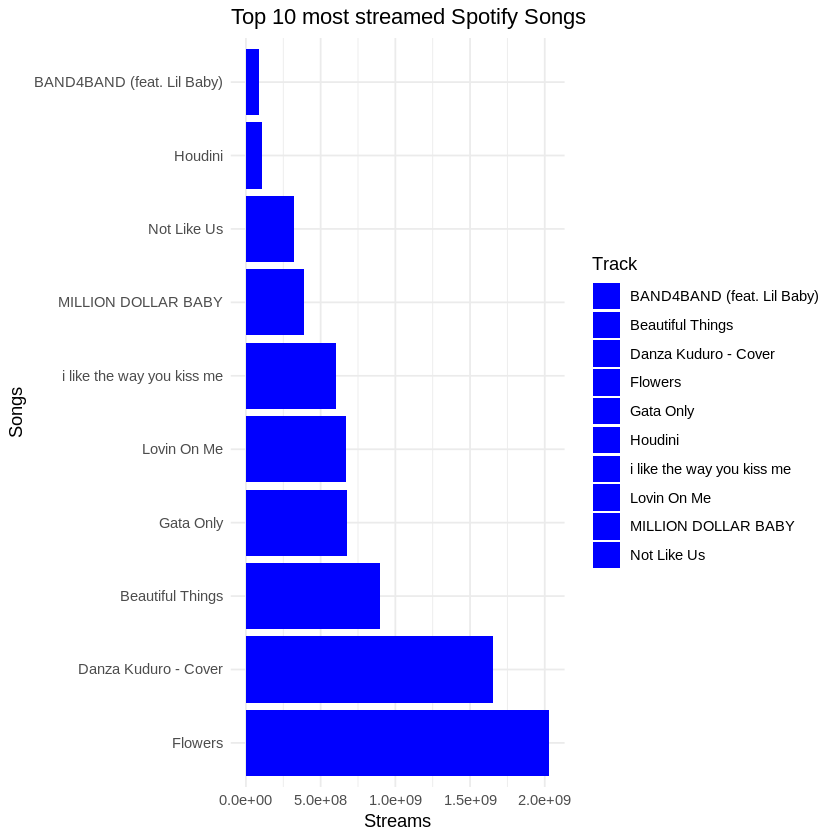

In [ ]:
ggplot(top_10_songs, aes(x = reorder(Track, -`Spotify Streams`), y = `Spotify Streams`, fill = Track)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  theme_minimal() +
  scale_fill_manual(values = rep("blue", 10)) +
  labs(title = "Top 10 most streamed Spotify Songs", x = "Songs", y = "Streams")

2. Top 10 artists by popularity

In [ ]:
top_10_artists_popularity <- data %>%
  group_by(Artist) %>%
  summarise(Total_Popularity = sum(`Spotify Streams`, na.rm = TRUE)) %>%
  arrange(desc(Total_Popularity)) %>%
  head(10)

print(top_10_artists_popularity)


# A tibble: 10 × 2
   Artist         Total_Popularity
   <chr>                     <dbl>
 1 Bad Bunny           37054834425
 2 The Weeknd          36948540278
 3 Drake               34962157577
 4 Taylor Swift        34470771165
 5 Post Malone         26137472958
 6 Ed Sheeran          24014900390
 7 Ariana Grande       23464991696
 8 MUSIC LAB JPN       22866685573
 9 Olivia Rodrigo      19729219749
10 Eminem              18878880174


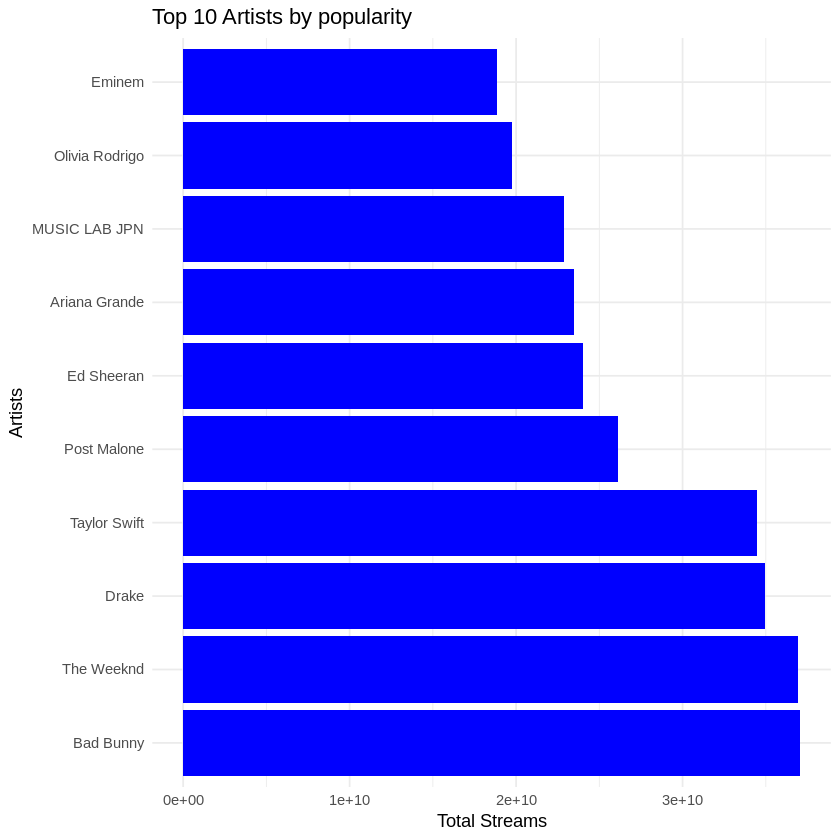

In [ ]:
ggplot(top_10_artists_popularity, aes(x = reorder(Artist, -Total_Popularity), y = Total_Popularity)) + # Added + operator
  geom_col(fill = "blue") +
  coord_flip() +
  theme_minimal() +
  labs(title = "Top 10 Artists by popularity", x = "Artists", y = "Total Streams")

3. Top 10 Artists by number of songs

In [ ]:
top_artists_song_count <- data %>%
  count(Artist, name = "Number of Songs") %>%
  arrange(desc(`Number of Songs`)) %>%
  head(10)

print(top_artists_song_count)


          Artist Number of Songs
1          Drake              63
2   Taylor Swift              63
3      Bad Bunny              60
4        KAROL G              32
5     The Weeknd              31
6   Travis Scott              30
7  Billie Eilish              27
8  Ariana Grande              26
9         Future              23
10    Peso Pluma              22


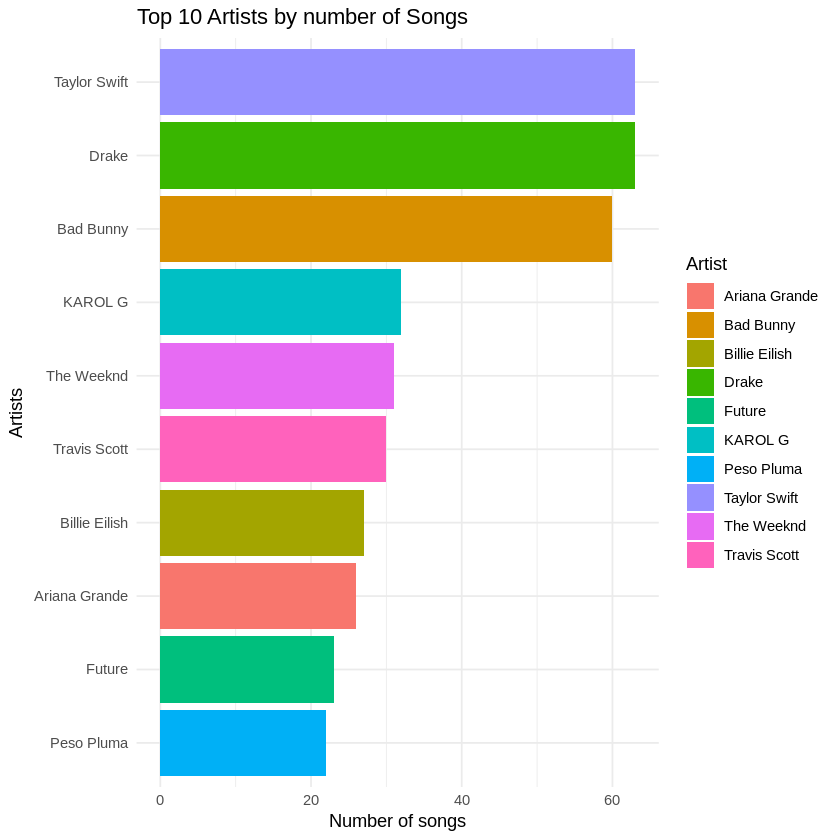

In [ ]:
ggplot(top_artists_song_count, aes(x = reorder(Artist, `Number of Songs`), y = `Number of Songs`, fill = Artist)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  theme_minimal() +
  labs(title = "Top 10 Artists by number of Songs", x = "Artists", y = "Number of songs")

4. Correlation Analysis

In [ ]:
numeric_data <- data %>%
  select('Spotify Streams','YouTube Views','TikTok Views','Pandora Streams') %>%
  na.omit()
cor_matrix <- cor(numeric_data, use="complete.obs")
print(cor_matrix)

                Spotify Streams YouTube Views TikTok Views Pandora Streams
Spotify Streams      1.00000000    0.52117702   0.05755168      0.60867515
YouTube Views        0.52117702    1.00000000   0.02389241      0.39644324
TikTok Views         0.05755168    0.02389241   1.00000000     -0.02638217
Pandora Streams      0.60867515    0.39644324  -0.02638217      1.00000000


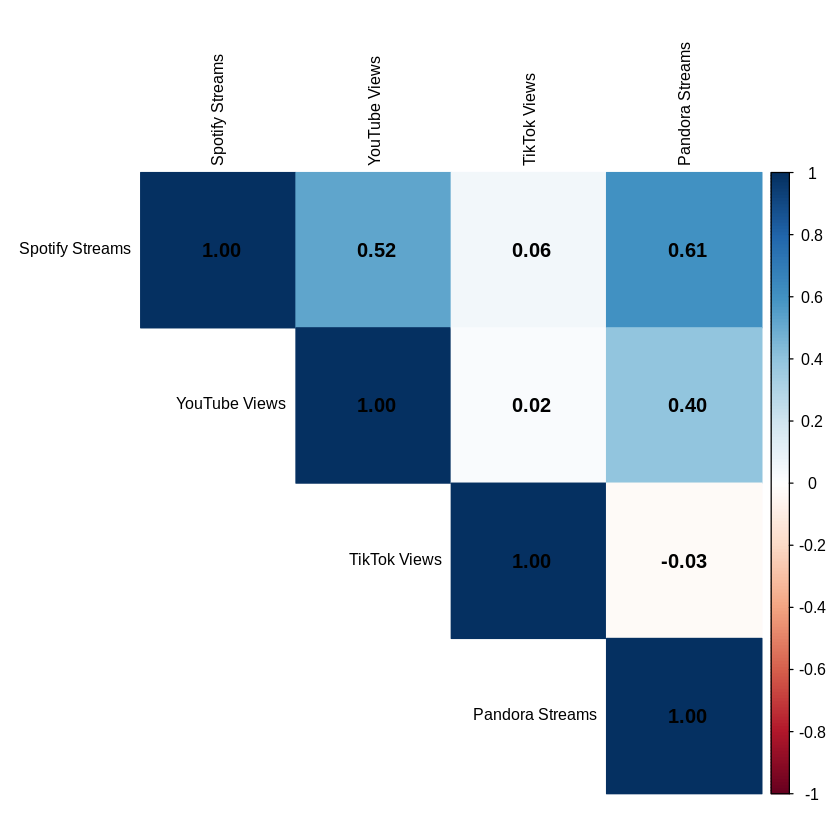

In [ ]:
corrplot::corrplot(cor_matrix,
                   method = "color",
                   type = "upper",
                   tl.cex = 0.8,
                   tl.col = "black",
                   addCoef.col = "black")


5. Comparing popularity of all platforms

In [ ]:
platform_popularity <- data %>%
  summarise(Spotify = sum(`Spotify Streams`, na.rm = TRUE),
            YouTube = sum(`YouTube Views`, na.rm = TRUE),
            TikTok = sum(`TikTok Views`, na.rm = TRUE),
            Pandora = sum(`Pandora Streams`, na.rm = TRUE))

print(platform_popularity)


       Spotify      YouTube      TikTok      Pandora
1 2.007427e+12 1.728804e+12 4.20223e+12 299321718299


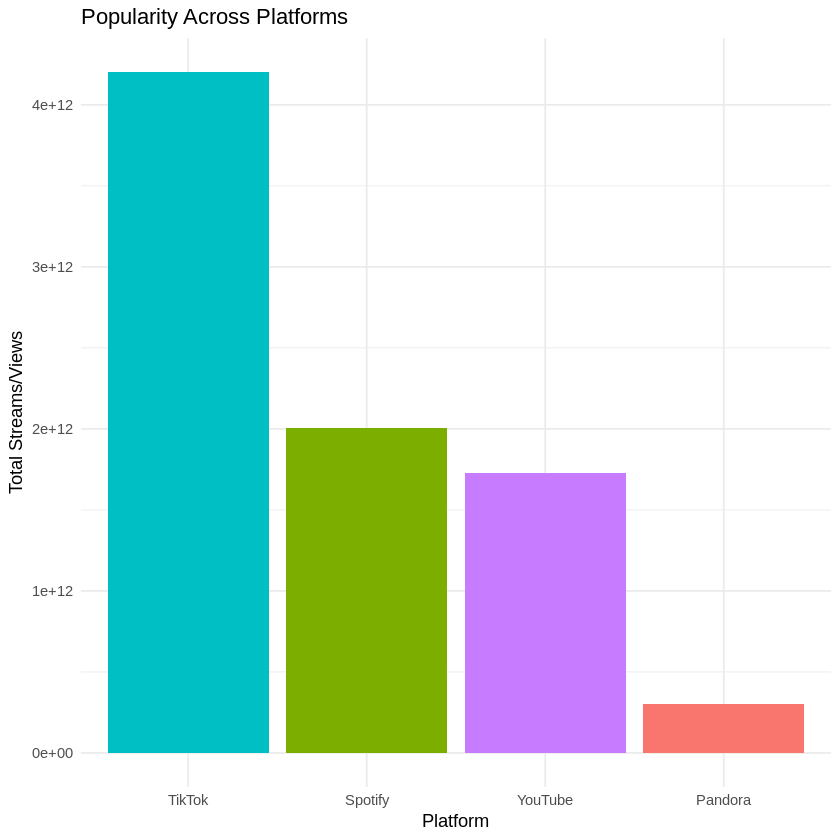

In [ ]:
platform_popularity_long <- platform_popularity %>%
  pivot_longer(cols = everything(), names_to = "Platform", values_to = "Total_Streams")

ggplot(platform_popularity_long, aes(x = reorder(Platform, -Total_Streams), y = Total_Streams , fill = Platform)) +
  geom_col() +
  theme_minimal() +
  labs(title = "Popularity Across Platforms", x = "Platform", y = "Total Streams/Views") +
  theme (legend.position = "none")